In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
# Load the data set
data = pd.read_csv("C:/Users/RamakrishnanSethu/OneDrive - Ocugen OpCo Inc/Documents/CMC/Log_Reg/dataset.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data Cleaning 

In [39]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [40]:
# Ensure all columns are numeric
for column in data.columns:
    data[column] = pd.to_numeric(data[column],errors = "coerce")

In [41]:
# Handle missing values (e.g., by filling them with mean of the column)
data = data.fillna(data.mean())
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [42]:
# Separate Features and Targets
X = data.drop(columns = ['target'])
y = data['target']

In [43]:
# Standardize the Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
# Split Data into train test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

## Logistic Regression 

In [45]:
# import Libraries
from sklearn.linear_model import LogisticRegression

In [46]:
# Initialize Logistic Regression Model
log_reg = LogisticRegression(random_state = 42, max_iter = 1000)


In [47]:
#Train the model
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [50]:
# Predict on test set
y_pred = log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [51]:
# Predict probabilities for ROC curve
y_pred_proba = log_reg.predict_proba(X_test)[:,1]
y_pred_proba

array([0.07913014, 0.65680438, 0.84657745, 0.02184108, 0.96059313,
       0.90042726, 0.62900456, 0.00148793, 0.00506922, 0.4507542 ,
       0.76734157, 0.05490672, 0.90359465, 0.03875953, 0.99113343,
       0.94364493, 0.98925007, 0.08542731, 0.00628189, 0.01103419,
       0.61977499, 0.01131368, 0.19701431, 0.77650772, 0.95652972,
       0.66885801, 0.88640424, 0.51386387, 0.00751395, 0.94616246,
       0.03343217, 0.026048  , 0.00597149, 0.08617988, 0.77959573,
       0.05880206, 0.68805625, 0.89063255, 0.79402262, 0.83464205,
       0.49212063, 0.74267117, 0.84516528, 0.71464207, 0.84683241,
       0.00606243, 0.78141791, 0.95744135, 0.09592516, 0.01658445,
       0.06623563, 0.00792887, 0.89592433, 0.9827836 , 0.16925569,
       0.00136388, 0.03319243, 0.96458854, 0.0152173 , 0.00261993,
       0.0386522 ])

In [55]:
# Return model coefficients and intercept
coefficients = log_reg.coef_
intercept = log_reg.intercept_

coefficients

array([[-0.08578324, -0.76887824,  0.82440658, -0.28404019, -0.17238198,
         0.09632823,  0.28088405,  0.40359686, -0.52315003, -0.71231089,
         0.44282488, -0.81347047, -0.58108839]])

In [56]:
intercept, y_pred[:5]

(array([-0.01238547]), array([0, 1, 1, 0, 1], dtype=int64))

## Evaluating the performance metrics of the logistic regression model

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [58]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, precision, recall, f1, roc_auc, conf_matrix

(0.8524590163934426,
 0.8709677419354839,
 0.84375,
 0.8571428571428571,
 0.9267241379310345,
 array([[25,  4],
        [ 5, 27]], dtype=int64))

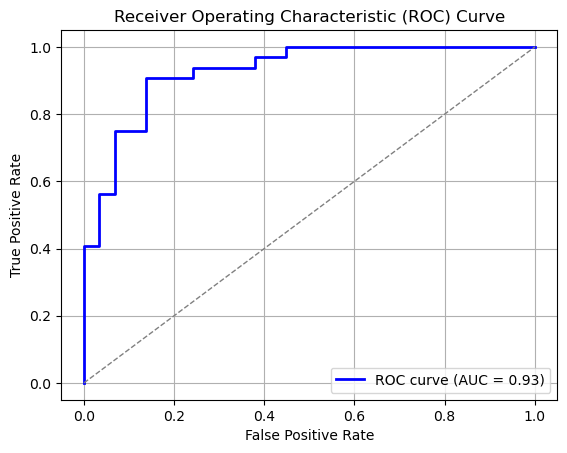

In [59]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Get predicted probabilities (already done)
# y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Step 2: Compute False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Step 3: Compute AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Step 4: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
